In [1]:
# import libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import pandas as pd
import json

# to be able to use tiem functionalities and be able to track time
import os 
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

# API pull location
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

print('Success!')
    
#NOTE:
# go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# into the Anaconda Prompt to change this to allow to pull data

# if that didn't work try using the local host URL:
# ???


Success!


In [3]:
type(data)

dict

In [5]:
#This allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977963e+07,1.977963e+07,False,NaN,1,NaN,NaN,None,2024-11-08T23:10:00.000Z,76448.138784,5.587100e+10,-11.4737,-0.188583,0.829544,10.031295,25.982252,33.835992,25.626415,1.512116e+12,58.5909,1.605411e+12,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
1,1027,Ethereum,ETH,ethereum,9496,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204201e+08,1.204201e+08,True,NaN,2,NaN,NaN,None,2024-11-08T23:10:00.000Z,2960.169169,3.263646e+10,-7.8420,0.312484,3.022260,17.748793,24.946861,25.568478,13.686809,3.564640e+11,13.8121,3.564640e+11,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
2,825,Tether USDt,USDT,tether,102687,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.219537e+11,1.228363e+11,True,NaN,3,NaN,NaN,None,2024-11-08T23:10:00.000Z,1.000426,1.030486e+11,-8.9067,-0.006403,-0.009733,0.102734,0.074337,0.013063,0.030056,1.220057e+11,4.7274,1.228886e+11,None,2024-11-08T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-08 15:12:53.170371
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.716762e+08,5.880925e+08,True,NaN,4,NaN,NaN,None,2024-11-08T23:10:00.000Z,198.601377,5.691557e+09,20.6131,-0.361198,1.858089,19.634187,42.608316,47.840099,28.777876,9.367555e+10,3.6297,1.167960e+11,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440995e+08,1.440995e+08,False,NaN,5,NaN,NaN,None,2024-11-08T23:10:00.000Z,596.557255,1.890106e+09,-3.2546,0.097448,-0.016989,4.208390,4.632371,15.019357,13.925331,8.596360e+10,3.3299,8.596360e+10,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
5,3408,USDC,USDC,usd-coin,22913,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.718727e+10,3.718727e+10,False,NaN,6,NaN,NaN,None,2024-11-08T23:10:00.000Z,0.999573,9.926086e+09,-13.6112,-0.001525,-0.028175,-0.028679,-0.057727,-0.053224,-0.036613,3.717141e+10,1.4397,3.717141e+10,None,2024-11-08T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-08 15:12:53.170371
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-08T23:10:00.000Z,0.553414,1.492653e+09,-21.4253,0.147634,0.106521,8.068817,5.253619,2.504037,-5.438054,3.147190e+10,1.2191,5.534138e+10,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467116e+11,1.467116e+11,True,NaN,8,NaN,NaN,None,2024-11-08T23:10:00.000Z,0.203380,4.041384e+09,-7.8065,0.122380,6.576342,28.263408,88.870334,96.440108,93.407536,2.983824e+10,1.1557,2.983824e+10,None,2024-11-08T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:12:53.170371
8,2010,Cardano,ADA,cardano,1332,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.5

In [24]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# Had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # #This normalizes the data and makes it all pretty in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['timestamp'] = pd.to_datetime('now')
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df2,df_append])

    #Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\njmlo\Desktop\New folder\API.csv'):
        df.to_csv(r'C:\Users\njmlo\Desktop\New folder\API.csv', header='column_names', index=False)
    else:
        df.to_csv(r'C:\Users\njmlo\Desktop\New folder\API.csv', 'a', header=False, index=False)
    
# If that didn't work try using the local host URL as shown in the video

In [28]:
# # automate to auto-run the API pull from source

for i in range(333):
    api_runner()
    print('Lo and behold! API Runner completed!') # non-csv code   
    #print('Lo and behold! API Runner (CSV) completed!') # csv code   
    # this is in seconds
    sleep(60) # wait every minute and auto-rerun again
exit()


Lo and behold! API Runner completed!
Lo and behold! API Runner completed!


KeyboardInterrupt: 

In [14]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977963e+07,1.977963e+07,False,NaN,1,NaN,NaN,None,2024-11-08T23:13:00.000Z,76440.416801,5.584697e+10,-11.4703,-0.190049,0.861985,9.955197,26.052909,33.848257,25.573908,1.511963e+12,58.5580,1.605249e+12,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
1,1027,Ethereum,ETH,ethereum,9496,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204201e+08,1.204201e+08,True,NaN,2,NaN,NaN,None,2024-11-08T23:13:00.000Z,2961.042122,3.263109e+10,-7.7107,0.326297,3.067646,17.806976,25.057865,25.654167,13.680291,3.565691e+11,13.8098,3.565691e+11,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
2,825,Tether USDt,USDT,tether,102687,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.219537e+11,1.228363e+11,True,NaN,3,NaN,NaN,None,2024-11-08T23:13:00.000Z,1.000299,1.030071e+11,-8.8743,0.002096,-0.038169,0.102043,0.114068,0.009883,0.009493,1.219902e+11,4.7247,1.228730e+11,None,2024-11-08T23:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-08 15:15:11.423088
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.716762e+08,5.880925e+08,True,NaN,4,NaN,NaN,None,2024-11-08T23:13:00.000Z,198.637229,5.687325e+09,20.9158,-0.310047,2.065493,19.643280,42.782012,47.673173,28.754012,9.369246e+10,3.6287,1.168171e+11,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440995e+08,1.440995e+08,False,NaN,5,NaN,NaN,None,2024-11-08T23:13:00.000Z,596.697711,1.887931e+09,-3.2913,0.099938,0.006512,4.225217,4.723677,15.016118,13.925138,8.598384e+10,3.3301,8.598384e+10,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
5,3408,USDC,USDC,usd-coin,22913,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.718727e+10,3.718727e+10,False,NaN,6,NaN,NaN,None,2024-11-08T23:13:00.000Z,0.999511,9.922365e+09,-13.6870,-0.002077,-0.040088,-0.029975,-0.040948,-0.045844,-0.045941,3.716908e+10,1.4395,3.716908e+10,None,2024-11-08T23:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-08 15:15:11.423088
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-08T23:13:00.000Z,0.553459,1.491743e+09,-21.4023,0.102010,0.157580,8.066889,5.359012,2.485110,-5.495411,3.147447e+10,1.2190,5.534589e+10,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467116e+11,1.467116e+11,True,NaN,8,NaN,NaN,None,2024-11-08T23:13:00.000Z,0.203438,4.040553e+09,-7.7688,-0.194128,6.631740,28.127583,89.100580,96.396681,93.409049,2.984674e+10,1.1560,2.984674e+10,None,2024-11-08T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:15:11.423088
8,2010,Cardano,ADA,cardano,1332,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.500

In [34]:
# # only run this if appended file is an output to a csv file

df50 = pd.read_csv(r'C:\Users\njmlo\Desktop\New folder\API.csv')
df50


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977966e+07,1.977966e+07,False,NaN,1,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,76519.686331,5.530987e+10,-12.7735,0.083647,0.606832,10.177357,26.170964,33.958596,25.734602,1.513533e+12,58.5906,1.606913e+12,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
1,1027,Ethereum,ETH,ethereum,9496,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204201e+08,1.204201e+08,True,NaN,2,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,2958.241572,3.235006e+10,-8.3676,-0.020043,1.996843,17.765173,24.904008,25.168788,13.491169,3.562319e+11,13.7901,3.562319e+11,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
2,825,Tether USDt,USDT,tether,102687,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.219537e+11,1.228363e+11,True,NaN,3,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,1.000556,1.022625e+11,-9.5976,-0.001978,-0.019055,0.108696,0.143494,0.032514,0.035756,1.220215e+11,4.7231,1.229046e+11,NaN,2024-11-08T23:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-08 15:51:03.432661
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.716757e+08,5.880922e+08,True,NaN,4,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,199.887477,5.675168e+09,20.9165,0.537565,1.886825,20.258083,43.352663,48.042247,29.926491,9.428206e+10,3.6495,1.175523e+11,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440995e+08,1.440995e+08,False,NaN,5,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,597.294753,1.873595e+09,-4.8433,0.178842,-0.291324,4.338387,4.683110,14.947890,14.117707,8.606988e+10,3.3317,8.606988e+10,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
5,3408,USDC,USDC,usd-coin,22913,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.718802e+10,3.718802e+10,False,NaN,6,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,0.999789,9.908661e+09,-13.7510,-0.003327,-0.019601,-0.015355,-0.013646,-0.018774,-0.015842,3.718019e+10,1.4391,3.718019e+10,NaN,2024-11-08T23:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-08 15:51:03.432661
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,0.553674,1.494901e+09,-20.8886,-0.009844,-0.251807,7.955229,5.470488,2.526191,-5.462483,3.148671e+10,1.2188,5.536742e+10,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.467120e+11,1.467119e+11,True,NaN,8,NaN,NaN,NaN,2024-11-08T23:49:00.000Z,0.201829,4.079333e+09,-6.5431,-0.630376,4.208170,26.801873,86.740905,94.171252,92.077506,2.961069e+10,1.1461,2.961069e+10,NaN,2024-11-08T23:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:51:03.432661
8,2010,Cardano,ADA,cardano,1332,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.500299e+10,4.49

In [36]:
# One thing is the scientific notation data displayed
# clean up to display the full number

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19779659.00000,19779659.00000,False,NaN,1,NaN,NaN,None,2024-11-08T23:50:00.000Z,76527.52133,55229489300.57706,-12.96130,0.08978,0.68042,10.18772,26.16167,33.99031,25.74007,1513688276001.90112,58.59010,1607077947908.00000,None,2024-11-08T23:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:52:04.732675
1,1027,Ethereum,ETH,ethereum,9496,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120420137.42597,120420137.42597,True,NaN,2,NaN,NaN,None,2024-11-08T23:50:00.000Z,2958.50418,32329193899.71074,-8.44400,-0.06918,2.10414,17.76596,24.82580,25.21213,13.46623,356263480491.14410,13.78980,356263480491.14001,None,2024-11-08T23:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:52:04.732675
2,825,Tether USDt,USDT,tether,102687,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,121953737784.44606,122836276400.68143,True,NaN,3,NaN,NaN,None,2024-11-08T23:50:00.000Z,1.00053,102182417771.92151,-9.69740,0.02631,-0.02294,0.10881,0.14165,0.03266,0.03199,122018244934.73067,4.72290,122901250367.75000,None,2024-11-08T23:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-08 15:52:04.732675
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471675669.80737,588092243.87972,True,NaN,4,NaN,NaN,None,2024-11-08T23:50:00.000Z,199.90696,5676308214.81479,20.88530,0.54103,1.92527,20.26902,43.33874,48.05784,29.93905,94291248738.73837,3.64990,117563732027.20000,None,2024-11-08T23:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:52:04.732675
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099503.30320,144099503.30320,False,NaN,5,NaN,NaN,None,2024-11-08T23:50:00.000Z,597.31254,1873260265.19968,-5.04950,0.16523,-0.26668,4.34185,4.66882,14.95187,14.11917,86072440332.27689,3.33180,86072440332.28000,None,2024-11-08T23:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:52:04.732675
5,3408,USDC,USDC,usd-coin,22913,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37188016366.87872,37188016366.87872,False,NaN,6,NaN,NaN,None,2024-11-08T23:50:00.000Z,0.99975,9906833936.38662,-13.75840,0.02049,-0.02623,-0.01432,-0.01343,-0.02234,-0.02104,37178822769.36269,1.43910,37178822769.36000,None,2024-11-08T23:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-08 15:52:04.732675
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,7,NaN,NaN,None,2024-11-08T23:50:00.000Z,0.55371,1496092174.88545,-20.86050,-0.00132,-0.23622,7.95965,5.46969,2.53229,-5.45676,31488837928.78875,1.21890,55371159445.84000,None,2024-11-08T23:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-08 15:52:04.732675
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146711956383.70517,146711946383.70523,True,NaN,8,NaN,NaN,None,2024-11-08T23:50:00.000Z,0.20188,4079333099.29869,-6.45950,-0.68403,4.26068,26.82172,86.73797,94.20745,92.11396,29617836610.37719,1.14640,29617834591.60000,None,2024-11-08T23:50:00.000Z,NaN,N

In [38]:
# look at the coin trends over time, grouped by name

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08978,0.68042,10.18772,26.16167,33.99031,25.74007
Ethereum,-0.06918,2.10414,17.76596,24.82580,25.21213,13.46623
Tether USDt,0.02631,-0.02294,0.10881,0.14165,0.03266,0.03199
Solana,0.54103,1.92527,20.26902,43.33874,48.05784,29.93905
BNB,0.16523,-0.26668,4.34185,4.66882,14.95187,14.11917
USDC,0.02049,-0.02623,-0.01432,-0.01343,-0.02234,-0.02104
XRP,-0.00132,-0.23622,7.95965,5.46969,2.53229,-5.45676
Dogecoin,-0.68403,4.26068,26.82172,86.73797,94.20745,92.11396
Cardano,-0.06498,10.36938,24.58219,30.81731,29.31183,28.32452


In [40]:
# have the prior dataframe column output as a row

df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.08978
              quote.USD.percent_change_24h     0.68042
              quote.USD.percent_change_7d     10.18772
              quote.USD.percent_change_30d    26.16167
              quote.USD.percent_change_60d    33.99031
              quote.USD.percent_change_90d    25.74007
Ethereum      quote.USD.percent_change_1h     -0.06918
              quote.USD.percent_change_24h     2.10414
              quote.USD.percent_change_7d     17.76596
              quote.USD.percent_change_30d    24.82580
              quote.USD.percent_change_60d    25.21213
              quote.USD.percent_change_90d    13.46623
Tether USDt   quote.USD.percent_change_1h      0.02631
              quote.USD.percent_change_24h    -0.02294
              quote.USD.percent_change_7d      0.10881
              quote.USD.percent_change_30d     0.14165
              quote.USD.percent_change_60d     0.03266
              quote.US

In [42]:
# determine the type
type(df3)


pandas.core.frame.DataFrame

In [44]:
# determine the type
type(df4)


pandas.core.series.Series

In [52]:
# have df4 into a Series, and move its dataframe into df5
df5 = df4.to_frame(name='values')

# determine the type
type(df5)


pandas.core.frame.DataFrame

In [54]:
#display data
df5


values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.08978
             quote.USD.percent_change_24h   0.68042
             quote.USD.percent_change_7d   10.18772
             quote.USD.percent_change_30d  26.16167
             quote.USD.percent_change_60d  33.99031
             quote.USD.percent_change_90d  25.74007
Ethereum     quote.USD.percent_change_1h   -0.06918
             quote.USD.percent_change_24h   2.10414
             quote.USD.percent_change_7d   17.76596
             quote.USD.percent_change_30d  24.82580
             quote.USD.percent_change_60d  25.21213
             quote.USD.percent_change_90d  13.46623
Tether USDt  quote.USD.percent_change_1h    0.02631
             quote.USD.percent_change_24h  -0.02294
             quote.USD.percent_change_7d    0.10881
             quote.USD.percent_change_30d   0.14165
             quote.USD.percent_change_60d   0.03266
             quote.USD.percent_change_90d   0.03199
Solana       quote.USD.percent_change_1h    0.54103
             quote.USD.percent_change_24h   1.92527
             quote.USD.percent_change_7d   20.26902
             quote.USD.percent_change_30d  43.33874
             quote.USD.percent_change_60d  48.05784
             quote.USD.percent_change_90d  29.93905
BNB          quote.USD.percent_change_1h    0.16523
             quote.USD.percent_change_24h  -0.26668
             quote.USD.percent_change_7d    4.34185
             quote.USD.percent_change_30d   4.66882
             quote.USD.percent_change_60d  14.95187
             quote.USD.percent_change_90d  14.11917
USDC         quote.USD.percent_change_1h    0.02049
             quote.USD.percent_change_24h  -0.02623
             quote.USD.percent_change_7d   -0.01432
             quote.USD.percent_change_30d  -0.01343
             quote.USD.percent_change_60d  -0.02234
             quote.USD.percent_change_90d  -0.02104
XRP          quote.USD.percent_change_1h   -0.00132
             quote.USD.percent_change_24h  -0.23622
             quote.USD.percent_change_7d    7.95965
             quote.USD.percent_change_30d   5.46969
             quote.USD.percent_change_60d   2.53229
             quote.USD.percent_change_90d  -5.45676
Dogecoin     quote.USD.percent_change_1h   -0.68403
             quote.USD.percent_change_24h   4.26068
             quote.USD.percent_change_7d   26.82172
             quote.USD.percent_change_30d  86.73797
             quote.USD.percent_change_60d  94.20745
             quote.USD.percent_change_90d  92.11396
Cardano      quote.USD.percent_change_1h   -0.06498
             quote.USD.percent_change_24h  10.36938
             quote.USD.percent_change_7d   24.58219
             quote.USD.percent_change_30d  30.81731
             quote.USD.percent_change_60d  29.31183
             quote.USD.percent_change_90d  28.32452
TRON         quote.USD.percent_change_1h   -0.08427
             quote.USD.percent_change_24h   0.36110
             quote.USD.percent_change_7d   -3.78391
             quote.USD.percent_change_30d   0.30871
             quote.USD.percent_change_60d   4.18918
             quote.USD.percent_change_90d  24.62669
Toncoin      quote.USD.percent_change_1h    0.24770
             quote.USD.percent_change_24h   0.18913
             quote.USD.percent_change_7d    0.68759
             quote.USD.percent_change_30d  -2.86951
             quote.USD.percent_change_60d  -5.79017
             quote.USD.percent_change_90d -26.33278
Avalanche    quote.USD.percent_change_1h    0.25627
             quote.USD.percent_change_24h   4.24335
             quote.USD.percent_change_7d   15.61801
             quote.USD.percent_change_30d  10.99973
             quote.USD.percent_change_60d  19.74300
             quote.USD.percent_change_90d  32.77120
Shiba Inu    quote.USD.percent_change_1h   -0.41005
             quote.USD.percent_change_24h  -0.95844
             quote.USD.percent_change_7d    8.23728
             quote.USD.percent_change_30d

In [56]:
# count the values within the dataframe
df5.count()


values    90
dtype: int64

In [58]:
# create a range and pass that as the dataframe

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# # If it only has the index and values try doing reset_index like "df5.reset_index()"

# index = pd.Index(range(90))

# # Set the above DataFrame index object as the index
# # using set_index() function
# df6 = df5.set_index(index)
# df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08978
1,Bitcoin,quote.USD.percent_change_24h,0.68042
2,Bitcoin,quote.USD.percent_change_7d,10.18772
3,Bitcoin,quote.USD.percent_change_30d,26.16167
4,Bitcoin,quote.USD.percent_change_60d,33.99031
5,Bitcoin,quote.USD.percent_change_90d,25.74007
6,Ethereum,quote.USD.percent_change_1h,-0.06918
7,Ethereum,quote.USD.percent_change_24h,2.10414
8,Ethereum,quote.USD.percent_change_7d,17.76596
9,Ethereum,quote.USD.percent_change_30d,24.82580


In [60]:
# Change the level_1 column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08978
1,Bitcoin,quote.USD.percent_change_24h,0.68042
2,Bitcoin,quote.USD.percent_change_7d,10.18772
3,Bitcoin,quote.USD.percent_change_30d,26.16167
4,Bitcoin,quote.USD.percent_change_60d,33.99031
5,Bitcoin,quote.USD.percent_change_90d,25.74007
6,Ethereum,quote.USD.percent_change_1h,-0.06918
7,Ethereum,quote.USD.percent_change_24h,2.10414
8,Ethereum,quote.USD.percent_change_7d,17.76596
9,Ethereum,quote.USD.percent_change_30d,24.82580


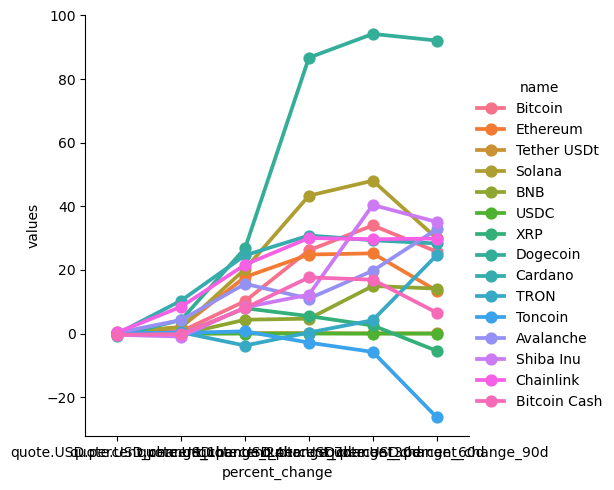

In [62]:
# dsplay a visualization

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [68]:
# cleanup the percent_change data display

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,0.08978
1,Bitcoin,24h,0.68042
2,Bitcoin,7d,10.18772
3,Bitcoin,30d,26.16167
4,Bitcoin,60d,33.99031
5,Bitcoin,90d,25.74007
6,Ethereum,1h,-0.06918
7,Ethereum,24h,2.10414
8,Ethereum,7d,17.76596
9,Ethereum,30d,24.82580


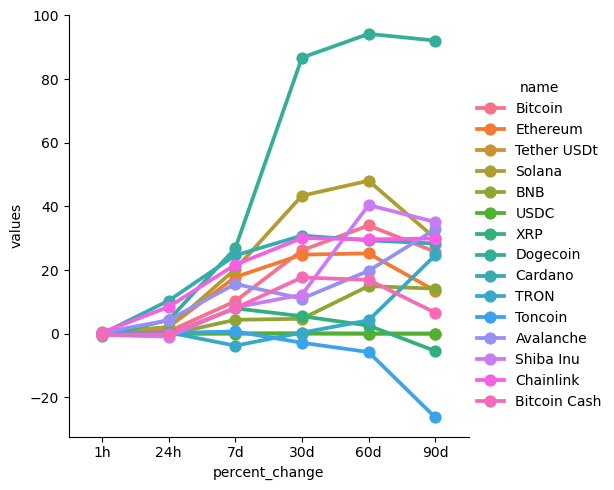

In [70]:
# dsplay a visualization

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [72]:
# Now to do something much simpler (ie., look at all crypto)
# we are going to create a dataframe with the columns we want

df8 = df[['name','quote.USD.price','timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,76527.52133,2024-11-08 15:52:04.732675
1,Ethereum,2958.50418,2024-11-08 15:52:04.732675
2,Tether USDt,1.00053,2024-11-08 15:52:04.732675
3,Solana,199.90696,2024-11-08 15:52:04.732675
4,BNB,597.31254,2024-11-08 15:52:04.732675
5,USDC,0.99975,2024-11-08 15:52:04.732675
6,XRP,0.55371,2024-11-08 15:52:04.732675
7,Dogecoin,0.20188,2024-11-08 15:52:04.732675
8,Cardano,0.44446,2024-11-08 15:52:04.732675
9,TRON,0.16098,2024-11-08 15:52:04.732675


In [74]:
# Now to do something much simpler (ie., look at one crypto "Bitcoin")
# we are going to create a dataframe with the columns we want

df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9


,name,quote.USD.price,timestamp
0,Bitcoin,76527.52133,2024-11-08 15:52:04.732675


In [76]:
# Now to do something much simpler (ie., look at one crypto "Avalanche")
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Avalanche'")
df10

,name,quote.USD.price,timestamp
11,Avalanche,28.64386,2024-11-08 15:52:04.732675


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

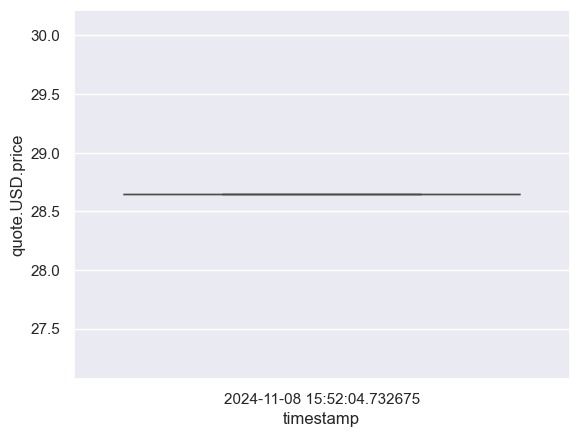

In [138]:
# dsplay a visualization

sns.set_theme(style="darkgrid")
sns.boxplot(x='timestamp', y='quote.USD.price', data = df10)
